In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import pathlib
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon, LineString

# Storm Forecasts & Track
Storm forecasts and historical track will be published for each in-game day.

The forecasts represent model predictions for where the hurricane might be at the given timestamp.

The storm track represents the true path that the storm took in the past.

In [2]:
# Forecasts
day1_forecast = gpd.read_file('https://files.bwsi-remote-sensing.net/data/final/day1/day1_forecasts.geojson')

In [3]:
random_color = lambda: np.random.random(3)

In [4]:
# look at the forecasts
day1_forecast

,prediction,forecastHour,datetime,maxWinds,category,geometry
0,1,12,2022-08-02 08:00:00,70,1,POINT (-69.75497 37.90491)
1,1,24,2022-08-02 20:00:00,75,1,POINT (-70.50738 38.86856)
2,1,36,2022-08-03 08:00:00,85,2,POINT (-71.35866 39.41313)
3,1,48,2022-08-03 20:00:00,85,2,POINT (-71.72152 40.51758)
4,1,60,2022-08-04 08:00:00,100,3,POINT (-71.48969 41.18486)
...,...,...,...,...,...,...
155,20,48,2022-08-03 20:00:00,85,2,POINT (-71.49297 40.27587)
156,20,60,2022-08-04 08:00:00,100,3,POINT (-70.95934 42.12895)
157,20,72,2022-08-04 20:00:00,105,3,POINT (-71.61717 40.70945)
158,20,96,2022-08-05 20:00:00,90,2,POINT (-70.44554 43.65152)


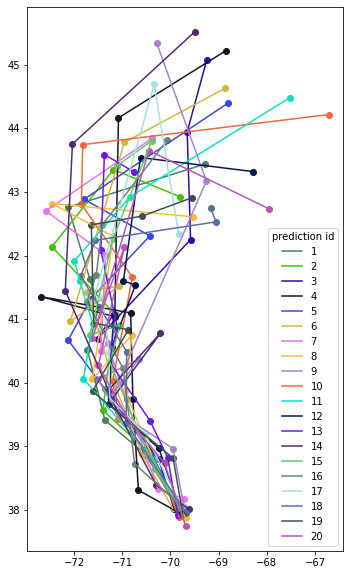

In [5]:
# each forecast report has a number of possible hurricane routes
# they are identified by the prediction column
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for pred_id, pred in day1_forecast.groupby('prediction'):
    c = random_color()
    pred.plot(color=c, ax=ax)
    line_to_plot = LineString(pred.geometry.values)
    ax.plot(line_to_plot.xy[0], line_to_plot.xy[1], color=c, label=f'{pred_id}')
ax.legend(title='prediction id')

<AxesSubplot:>

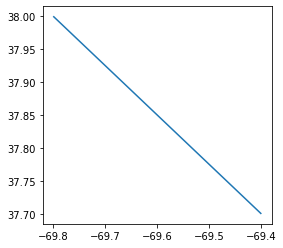

In [6]:
# track shows where the storm actually went in the past
day1_track = gpd.read_file('https://files.bwsi-remote-sensing.net/data/final/day1/day1_track_past.geojson')
day1_track.plot()

# Location of Areas of Interest


In [7]:
!wget https://files.bwsi-remote-sensing.net/data/final/R1-Hospitals.zip -O R1-Hospitals.zip
!unzip R1-Hospitals.zip

--2022-08-03 08:29:57--  https://files.bwsi-remote-sensing.net/data/final/R1-Hospitals.zip
Resolving files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)... 52.89.89.162, 52.41.214.209, 35.80.100.25, ...
Connecting to files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)|52.89.89.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21464 (21K) [application/zip]
Saving to: ‘R1-Hospitals.zip’

R1-Hospitals.zip    100%[===================>]  20.96K  --.-KB/s    in 0.001s  

2022-08-03 08:29:58 (35.1 MB/s) - ‘R1-Hospitals.zip’ saved [21464/21464]

Archive:  R1-Hospitals.zip
   creating: R1-Hospitals/
 extracting: R1-Hospitals/R1Hospitals_Clip.cpg  
  inflating: R1-Hospitals/R1Hospitals_Clip.dbf  
  inflating: R1-Hospitals/R1Hospitals_Clip.prj  
  inflating: R1-Hospitals/R1Hospitals_Clip.sbn  
  inflating: R1-Hospitals/R1Hospitals_Clip.sbx  
  inflating: R1-Hospitals/R1Hospitals_Clip.shp  
  inflating: R1-Hospitals/R1Hospitals_Clip.shp.xml  
  infla

In [8]:
!wget https://files.bwsi-remote-sensing.net/data/final/R1-Shelters.zip -O R1-Shelters.zip
!unzip R1-Shelters.zip

--2022-08-03 08:29:58--  https://files.bwsi-remote-sensing.net/data/final/R1-Shelters.zip
Resolving files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)... 52.41.214.209, 35.80.100.25, 54.213.230.179, ...
Connecting to files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)|52.41.214.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145113 (142K) [application/zip]
Saving to: ‘R1-Shelters.zip’

R1-Shelters.zip     100%[===================>] 141.71K  --.-KB/s    in 0.1s    

2022-08-03 08:29:58 (1.44 MB/s) - ‘R1-Shelters.zip’ saved [145113/145113]

Archive:  R1-Shelters.zip
 extracting: R1-Shelters/R1Shelters_Clip.cpg  
  inflating: R1-Shelters/R1Shelters_Clip.dbf  
  inflating: R1-Shelters/R1Shelters_Clip.prj  
  inflating: R1-Shelters/R1Shelters_Clip.sbn  
  inflating: R1-Shelters/R1Shelters_Clip.sbx  
  inflating: R1-Shelters/R1Shelters_Clip.shp  
  inflating: R1-Shelters/R1Shelters_Clip.shp.xml  
  inflating: R1-Shelters/R1Shelters_Clip.shx 

In [9]:
hospitals_gdf = gpd.read_file('R1-Hospitals/')
shelters_gdf = gpd.read_file('R1-Shelters/')

In [10]:
hospitals_gdf

,OBJECTID,ID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,ZIP4,TELEPHONE,...,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,DATECREATE,geometry
0,18.0,0006002401,VA MEDICAL CENTER - BROCKTON DIVISION,940 BELMONT ST,NOT AVAILABLE,BROCKTON,MA,02401,NOT AVAILABLE,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,25,GOVERNMENT - FEDERAL,-999.0,-999.0,NOT AVAILABLE,N,2015-04-20,POINT Z (-71.05394 42.06302 0.00000)
1,20.0,0006802132,VA MEDICAL CENTER - WEST ROXBURY DIVISION,1400 VFW PKY,NOT AVAILABLE,WEST ROXBURY,MA,02132,NOT AVAILABLE,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,25,GOVERNMENT - FEDERAL,-999.0,-999.0,NOT AVAILABLE,N,2015-04-20,POINT Z (-71.17170 42.27463 0.00000)
2,24.0,0001102908,PROVIDENCE VA MEDICAL CENTER,830 CHALKSTONE AVE,NOT AVAILABLE,PROVIDENCE,RI,02908,NOT AVAILABLE,NOT AVAILABLE,...,12,NOT AVAILABLE,44,GOVERNMENT - FEDERAL,-999.0,73.0,NOT AVAILABLE,NOT AVAILABLE,2013-05-28,POINT Z (-71.43357 41.83194 0.00000)
3,25.0,0001702896,REHABILITATION HOSPITAL OF RHODE ISLAND,116 EDDIE DOWLING HIGHWAY,NOT AVAILABLE,NORTH SMITHFIELD,RI,02896,NOT AVAILABLE,NOT AVAILABLE,...,20,NOT AVAILABLE,44,PROPRIETARY,-999.0,70.0,NOT AVAILABLE,NOT AVAILABLE,2013-05-28,POINT Z (-71.51284 41.98158 0.00000)
4,26.0,0000902920,ELEANOR SLATER HOSPITAL,3 REGAN COURT,NOT AVAILABLE,CRANSTON,RI,02920,NOT AVAILABLE,NOT AVAILABLE,...,10,NOT AVAILABLE,44,GOVERNMENT - STATE,-999.0,495.0,NOT AVAILABLE,Y,2013-05-28,POINT Z (-71.46322 41.74471 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,243.0,0006902139,CAMBRIDGE HEALTH ALLIANCE - CAMBRIDGE CAMPUS,1493 CAMBRIDGE STREET,NOT AVAILABLE,CAMBRIDGE,MA,02139,NOT AVAILABLE,NOT AVAILABLE,...,69,CAMBRIDGE HOSPITAL,25,GOVERNMENT - DISTRICT/AUTHORITY,-999.0,219.0,NOT AVAILABLE,NOT AVAILABLE,2013-03-11,POINT Z (-71.10410 42.37450 0.00000)
102,244.0,0008001805,LAHEY CLINIC MEDICAL CENTER,41 MALL ROAD,NOT AVAILABLE,BURLINGTON,MA,01805,NOT AVAILABLE,NOT AVAILABLE,...,11,LAHEY CLINIC MEDICAL CENTER,25,NON-PROFIT,-999.0,327.0,II,NOT AVAILABLE,2013-03-11,POINT Z (-71.19890 42.48830 0.00000)
103,245.0,0008102149,CAMBRIDGE HEALTH ALLIANCE - WHIDDEN MEMORIAL C...,103 GARLAND STREET,NOT AVAILABLE,EVERETT,MA,02149,NOT AVAILABLE,NOT AVAILABLE,...,14,WHIDDEN MEMORIAL HOSPITAL,25,GOVERNMENT - DISTRICT/AUTHORITY,-999.0,-999.0,NOT AVAILABLE,NOT AVAILABLE,2013-03-11,POINT Z (-71.03940 42.40930 0.00000)
104,255.0,0005102571,SOUTHCOAST HOSPITALS GROUP - TOBEY HOSPITAL CA...,43 HIGH STREET,NOT AVAILABLE,WAREHAM,MA,02571,NOT AVAILABLE,NOT AVAILABLE,...,43,TOBEY HOSPITAL,25,NON-PROFIT,-999.0,-999.0,NOT AVAILABLE,Y,2013-03-11,POINT Z (-70.71440 41.75610 0.00000)


In [11]:
shelters_gdf

,OBJECTID,ID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,ZIP4,TELEPHONE,...,FLOOD_500,PET_CODE,PET_DESC,ADA,WHEEL,ELECTRIC,PRE,FEMA_REG,GlobalID,geometry
0,1588.0,440053,CHARIHO HIGH SCHOOL,453 SWITCH RD,NOT AVAILABLE,WOOD RIVER JUNCTION,RI,02894,NOT AVAILABLE,(401) 364-7778,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,YES,YES,NOT AVAILABLE,1,2849075b-c840-467b-b7e9-00249d4d3fca,POINT Z (-71.69645 41.45008 0.00000)
1,169.0,250058,PLYMOUTH MEMORIAL HALL,83 COURT ST,NOT AVAILABLE,PLYMOUTH,MA,02360,NOT AVAILABLE,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,YES,YES,NOT AVAILABLE,1,600b60ba-f089-4375-b2ef-00f25e526961,POINT Z (-70.66869 41.95994 0.00000)
2,2657.0,440080,WESTERN HILLS MIDDLE SCHOOL,400 PHENIX AVE,NOT AVAILABLE,CRANSTON,RI,02920,NOT AVAILABLE,(401) 270-8030,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,YES,YES,NOT AVAILABLE,1,9b4ea786-c482-4cbb-a807-013b50050726,POINT Z (-71.47714 41.77518 0.00000)
3,3143.0,440143,POLICE COMMUNITY ROOM,4901 OLD POST ROAD,NOT AVAILABLE,CHARLESTOWN,RI,02813,NOT AVAILABLE,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,1,f200cbbc-feaf-4e6c-a2c3-015032a2d35f,POINT Z (-71.66757 41.37474 0.00000)
4,2720.0,251067,BEDFORD HIGH SCHOOL,9 MUDGE WAY,NOT AVAILABLE,BEDFORD,MA,01730,NOT AVAILABLE,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,1,d5938bf7-b3ed-441c-8d3d-01644b9d3c5f,POINT Z (-71.28554 42.49140 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,1820.0,250847,FIRE STATION 6,962 HAMMOND ST,NOT AVAILABLE,CHESTNUT HILL,MA,02467,NOT AVAILABLE,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,YES,NOT AVAILABLE,1,18aa685e-ff3d-4447-83d4-fe34670fc2f6,POINT Z (-71.16347 42.31167 0.00000)
788,2476.0,251026,VETERAN'S MEMORIAL ELEMENTARY SCHOOL,39 HURD AVE,NOT AVAILABLE,SAUGUS,MA,01906,NOT AVAILABLE,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,YES,YES,NOT AVAILABLE,1,b997fcbd-4435-4061-8ccc-fef89e655602,POINT Z (-71.00399 42.45417 0.00000)
789,654.0,250524,SHELBURNE COMMUNITY CENTER,2730 WASHINGTON ST,NOT AVAILABLE,BOSTON,MA,02119,NOT AVAILABLE,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,YES,NOT AVAILABLE,1,1f53924d-a466-48e3-87b5-ff54ada213f8,POINT Z (-71.09033 42.32234 0.00000)
790,291.0,250161,ESTEN ELEMENTARY SCHOOL,733 SUMMER ST,NOT AVAILABLE,ROCKLAND,MA,02370,NOT AVAILABLE,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,YES,YES,NOT AVAILABLE,1,da53bd19-a40c-48df-a2b4-ff60ed0e0449,POINT Z (-70.89703 42.11026 0.00000)


# Game Grid
This is the grid that represents the scope of the response, and also the transportation network
It uses the [Military Grid Reference System](https://en.wikipedia.org/wiki/Military_Grid_Reference_System) to divide the world into a grid. There is a unique alphanumeric string that identifies each cell. We are working at the 1km resolution of the grid. See also the [US National Grid](https://www.fgdc.gov/usng/how-to-read-usng) which is nearly identical, except for some [edge-cases](https://www.maptools.com/tutorials/mgrs_usng_diffs).

The `MGRS` column is a unique alphanumeric ID for each cell. It should be used as your node ID for your transport network.

In [12]:
# downloading pre-hurricane game grid (pretty big file ~ 111 MB)
!wget https://files.bwsi-remote-sensing.net/data/final/game_grid_2022.geojson

--2022-08-03 08:29:59--  https://files.bwsi-remote-sensing.net/data/final/game_grid_2022.geojson
Resolving files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)... 35.80.100.25, 54.213.230.179, 52.89.89.162, ...
Connecting to files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)|35.80.100.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116721567 (111M)
Saving to: ‘game_grid_2022.geojson’

game_grid_2022.geoj 100%[===================>] 111.31M  7.42MB/s    in 24s     

2022-08-03 08:30:23 (4.70 MB/s) - ‘game_grid_2022.geojson’ saved [116721567/116721567]



In [13]:
game_grid = gpd.read_file('game_grid_2022.geojson')

In [14]:
game_grid

,EASTING,NORTHING,kmSQ_ID,GZD,Shape_Leng,MGRS,MGRS_10km,transport_score,geometry
0,596000mE,4984000mN,WQ,18T,400000.000000,18TWQ9684,18TWQ98,1,"POLYGON ((-73.76921 45.00282, -73.78190 45.002..."
1,597000mE,4984000mN,WQ,18T,400000.000000,18TWQ9784,18TWQ98,1,"POLYGON ((-73.75653 45.00268, -73.76921 45.002..."
2,598000mE,4984000mN,WQ,18T,400000.000000,18TWQ9884,18TWQ98,1,"POLYGON ((-73.74384 45.00254, -73.75653 45.002..."
3,599000mE,4984000mN,WQ,18T,400000.000000,18TWQ9984,18TWQ98,1,"POLYGON ((-73.73116 45.00240, -73.74384 45.002..."
4,579000mE,4983000mN,WQ,18T,400000.000000,18TWQ7983,18TWQ78,1,"POLYGON ((-73.98504 44.99594, -73.99773 44.996..."
...,...,...,...,...,...,...,...,...,...
232562,282000mE,4558000mN,BF,19T,0.041828,19TBF8258,19TBF85,1,"POLYGON ((-71.58574 41.14431, -71.59765 41.144..."
232563,283000mE,4558000mN,BF,19T,0.041828,19TBF8358,19TBF85,1,"POLYGON ((-71.57384 41.14458, -71.58574 41.144..."
232564,284000mE,4558000mN,BF,19T,0.041828,19TBF8458,19TBF85,1,"POLYGON ((-71.56193 41.14484, -71.57384 41.144..."
232565,285000mE,4558000mN,BF,19T,0.041828,19TBF8558,19TBF85,1,"POLYGON ((-71.55003 41.14511, -71.56193 41.144..."


## Get the cells neighboring each cell
Buffer and use spatial join with `overlap` to find which cells are neighboring each other

In [15]:
buffered_game_grid = game_grid.to_crs('epsg:3857')
buffered_game_grid.geometry = buffered_game_grid.buffer(10)
neighboring_gdf = gpd.sjoin(buffered_game_grid, game_grid.to_crs('epsg:3857'), op='overlaps')

/Users/sahil/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [16]:
neighboring_gdf

,EASTING_left,NORTHING_left,kmSQ_ID_left,GZD_left,Shape_Leng_left,MGRS_left,MGRS_10km_left,transport_score_left,geometry,index_right,EASTING_right,NORTHING_right,kmSQ_ID_right,GZD_right,Shape_Leng_right,MGRS_right,MGRS_10km_right,transport_score_right
0,596000mE,4984000mN,WQ,18T,400000.000000,18TWQ9684,18TWQ98,1,"POLYGON ((-8211941.372 5621964.655, -8211941.4...",22,597000mE,4983000mN,WQ,18T,400000.000000,18TWQ9783,18TWQ98,1
1,597000mE,4984000mN,WQ,18T,400000.000000,18TWQ9784,18TWQ98,1,"POLYGON ((-8210529.225 5621943.016, -8210529.2...",22,597000mE,4983000mN,WQ,18T,400000.000000,18TWQ9783,18TWQ98,1
2,598000mE,4984000mN,WQ,18T,400000.000000,18TWQ9884,18TWQ98,1,"POLYGON ((-8209117.088 5621921.156, -8209117.1...",22,597000mE,4983000mN,WQ,18T,400000.000000,18TWQ9783,18TWQ98,1
21,596000mE,4983000mN,WQ,18T,400000.000000,18TWQ9683,18TWQ98,1,"POLYGON ((-8211962.822 5620547.855, -8211962.8...",22,597000mE,4983000mN,WQ,18T,400000.000000,18TWQ9783,18TWQ98,1
23,598000mE,4983000mN,WQ,18T,400000.000000,18TWQ9883,18TWQ98,1,"POLYGON ((-8209138.979 5620504.375, -8209139.0...",22,597000mE,4983000mN,WQ,18T,400000.000000,18TWQ9783,18TWQ98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232564,284000mE,4558000mN,BF,19T,0.041828,19TBF8458,19TBF85,1,"POLYGON ((-7966228.122 5033729.753, -7966228.1...",232565,285000mE,4558000mN,BF,19T,0.041828,19TBF8558,19TBF85,1
232566,286000mE,4558000mN,BF,19T,0.041829,19TBF8658,19TBF85,1,"POLYGON ((-7963577.664 5033807.714, -7963577.6...",232565,285000mE,4558000mN,BF,19T,0.041828,19TBF8558,19TBF85,1
232559,285000mE,4559000mN,BF,19T,0.041832,19TBF8559,19TBF85,2,"POLYGON ((-7964941.744 5035099.209, -7964941.7...",232566,286000mE,4558000mN,BF,19T,0.041829,19TBF8658,19TBF85,1
232560,286000mE,4559000mN,BF,19T,0.041832,19TBF8659,19TBF85,1,"POLYGON ((-7963616.325 5035138.116, -7963616.3...",232566,286000mE,4558000mN,BF,19T,0.041829,19TBF8658,19TBF85,1


## Visualizing the transport score
Highways and major roads have highest transport score. Rural areas have lowest transport score. Cities have intermediate transport score to model local roads

KeyboardInterrupt: 

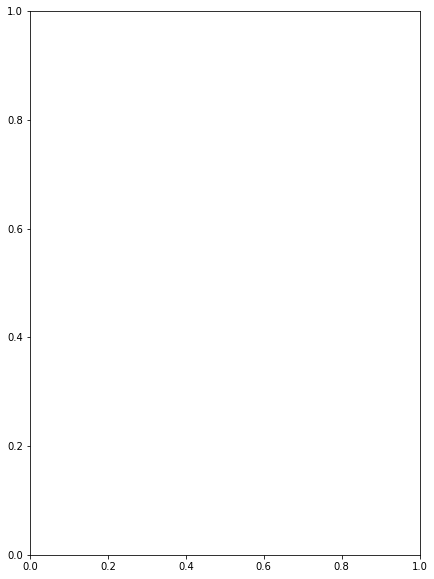

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
game_grid.plot(column='transport_score', ax=ax)

# Overall bounds of map
Useful for all teams to find additional GIS and remote sensing resources to use

In [ ]:
w,s,e,n = game_grid.total_bounds
print(w,s,e,n)

# Our Code

In [18]:
import ee
import geemap

ee.Authenticate()
ee.Initialize()

aoi = ee.FeatureCollection("CIESIN/GPWv411/GPW_Population_Count")

Enter verification code: 4/1AdQt8qggrqs8RYbJJvHT2ew7rJ29ep9hZ497DimfUjn-2PK_OEzhyyvd5k8

Successfully saved authorization token.
